# Lab 3 - Caravan Insurance Problem - Tom Dooney, 6230256

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import *
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import cohen_kappa_score as kappa
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import export_graphviz
import graphviz 
from sklearn import tree
import pydotplus
from pandas.io.parsers import read_csv
from sklearn import preprocessing
warnings.filterwarnings("ignore")

In [2]:
df_train = read_csv('caravan (2).csv')
X = df_train.iloc[:,0:len(df_train.columns)-1]
y = df_train['CARAVAN POLICY']
df_train.isnull().sum()

Customer Subtype                                    0
Number of houses                                    0
Avg size household                                  0
Avg Age                                             0
Customer main type                                  0
Roman catholic                                      0
Protestant                                          0
Other religion                                      0
No religion                                         0
Married                                             0
Living together                                     0
Other relation                                      0
Singles                                             0
Household without children                          0
Household with children                             0
High level education                                0
Medium level education                              0
Lower level education                               0
High status                 

No null values

## Assignment 1: Describe the actual or potential customers and possibly explain why these
## customers buy a caravan policy.

For this first assignment, an investigation will be made into some of the variables that describe the customers. By plotting these variables against frequency of customers (and non-customers), a clear visual description of caravan insurance customers should be visible.

Class 0 instances
 
5474
 
Class 1 instances
 
348


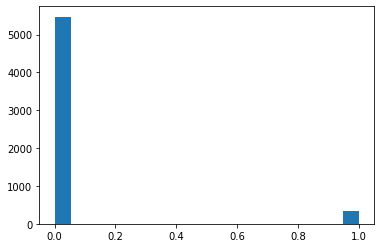

In [3]:
plt.hist(y, 19)

y = list(y)
class_one = y.count(1)
class_zero = y.count(0)

print('Class 0 instances')
print(' ')
print(class_zero)
print(' ')

print('Class 1 instances')
print(' ')
print(class_one)



Unbalanced dataset: considerably more class 0 instances than class 1

In [6]:
df_class_one =df_train[df_train['CARAVAN POLICY']== 1];
print('shape of dataset- only with class 1 records')
print(np.shape(df_class_one))
print(np.shape(df_train))

shape of dataset- only with class 1 records
(348, 86)
(5822, 86)


In [161]:
X_encoded = X
# creating dummy variable for customer main type

dummy = pd.get_dummies(X_encoded['Customer main type'])

Customer counts per Main Type: 
8     89
2     66
3     59
1     48
9     42
7     20
5     15
10     5
6      4
Name: Customer main type, dtype: int64
8     1563
3      886
9      667
5      569
1      552
7      550
2      502
10     276
6      205
4       52
Name: Customer main type, dtype: int64


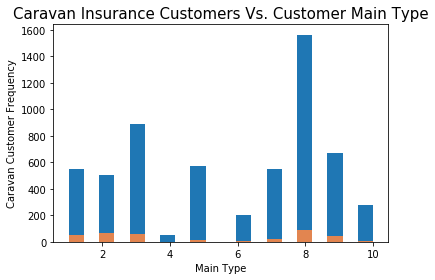

In [7]:
plt.title("Caravan Insurance Customers Vs. Customer Main Type",size=15)
plt.xlabel('Main Type')
plt.ylabel('Caravan Customer Frequency')
plt.hist(df_train['Customer main type'],20)
plt.hist(df_class_one['Customer main type'],20,color='#E28550' )


print('Customer counts per Main Type: ')
print(df_class_one['Customer main type'].value_counts())
print(df_train['Customer main type'].value_counts())

**8 = Family with Grown Ups (89/1563) 0.057, 2 = Driven Growers (66/502) 0.13, 3 = Average Family (59/886) 0.067, 1 = Successful Hedonsits (48/552) 0.087, 9 = Conservative Families (42/667) 0.063**

From the customer main type graph it is observed that the largest number of Caravan insurance customers in this data set are families with grown ups although this type contains most instances. Larger proportions of customers are actually of **Driven Growers, Successful Hedonists, AverageFamily** and **Conservative Families**. 

The least likely customers appear to be from **Career Loners, Cruising Seniors, Farmers**

Customer counts per Subtype: 
8     51
33    46
3     25
38    23
39    19
12    16
36    16
13    13
1     13
6     12
9     12
37    10
34     9
10     9
11     9
32     8
35     8
2      6
31     6
41     5
24     5
22     4
30     4
23     4
7      3
20     2
25     2
5      2
4      2
29     2
26     1
27     1
Name: Customer Subtype, dtype: int64
33    810
8     339
38    339
39    328
9     278
23    251
3     249
36    225
35    214
41    205
31    205
34    182
24    180
13    179
10    165
11    153
32    141
37    132
1     124
6     119
30    118
12    111
22     98
29     86
2      82
25     82
40     71
4      52
27     50
26     48
5      45
7      44
28     25
20     25
18     19
16     16
21     15
17      9
15      5
19      3
Name: Customer Subtype, dtype: int64


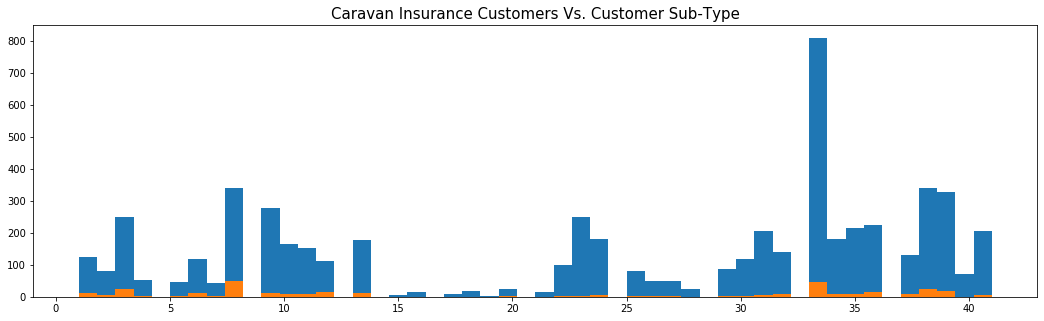

In [8]:
plt.figure(figsize=(6 * 3, 5))
plt.title("Caravan Insurance Customers Vs. Customer Sub-Type",size=15)
plt.hist(df_train['Customer Subtype'],50 )
plt.hist(df_class_one['Customer Subtype'],50 )

print('Customer counts per Subtype: ')
print(df_class_one['Customer Subtype'].value_counts())
print(df_train['Customer Subtype'].value_counts())

**8 = Middle class families (51/339) 0.15, 33 = Lower class large families (46/810) 0.056, 3 = High status seniors (25/249) 0.1, 38 = Traditional families (23/339) 0.067, 39 = Large religous families(19/238) 0.079, 12 = Affluent young families (16/111) 0.144, 36 = Couples with teens 'Married with children' (16/225) 0.071**

As can be seen the largest proportion of caravan customers belong to **Middle Class families**, **Affluent Young Families** and **High Status Seniors**.

Customer counts per Avg Age: 
3    183
2     87
4     64
5     12
6      1
1      1
Name: Avg Age, dtype: int64
3    3000
2    1452
4    1073
5     193
1      74
6      30
Name: Avg Age, dtype: int64


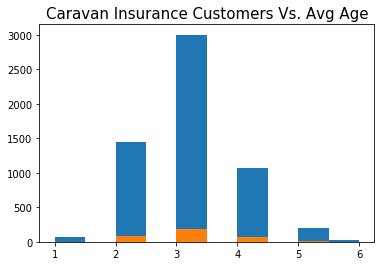

In [11]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. Avg Age",size=15)
plt.hist(df_train['Avg Age'],10)
plt.hist(df_class_one['Avg Age'],10)

print('Customer counts per Avg Age: ')
print(df_class_one['Avg Age'].value_counts())
print(df_train['Avg Age'].value_counts())


A normal distribution is observed here for both Class 1 and Class 0 instances. The most probable customers however are between 40-50 years old (**3**), containing the largest proportions.

Customer counts per Average income: 
4    139
5     70
3     69
6     24
2     20
7     17
8      8
1      1
Name: Average income, dtype: int64
3    1932
4    1854
5     733
2     651
6     355
7     131
8      70
1      49
0      25
9      22
Name: Average income, dtype: int64


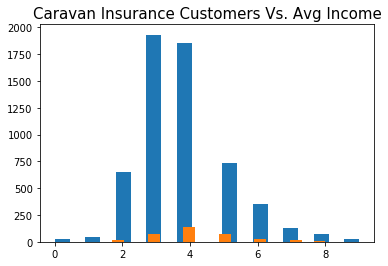

In [12]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. Avg Income",size=15)
plt.hist(df_train['Average income'],20)
plt.hist(df_class_one['Average income'],20)

print('Customer counts per Average income: ')
print(df_class_one['Average income'].value_counts())
print(df_train['Average income'].value_counts())

The largest proportions in the case of **Avg Income** is in classes **4** and **5**, meaning that most likely customers earn average to slightly greater than average incomes.

Customer counts per Purchasing power class: 
3    71
7    67
6    66
4    46
8    35
5    30
1    18
2    15
Name: Purchasing power class, dtype: int64
3    1524
4     902
6     901
1     587
5     583
7     474
8     426
2     425
Name: Purchasing power class, dtype: int64


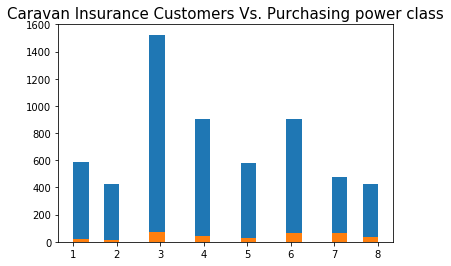

In [13]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. Purchasing power class",size=15)
plt.hist(df_train['Purchasing power class'],20)
plt.hist(df_class_one['Purchasing power class'],20)

print('Customer counts per Purchasing power class: ')
print(df_class_one['Purchasing power class'].value_counts())
print(df_train['Purchasing power class'].value_counts())

From this plot it is observed that people with slightly higher than average purchasing power are more likely to purchase Caravan insurance

Customer counts per Purchasing power class: 
7    116
6     71
9     66
5     48
8     25
4     10
3      6
2      3
0      2
1      1
Name: Married, dtype: int64
7    1683
6    1172
5     946
9     794
8     361
4     324
3     246
2     157
1      75
0      64
Name: Married, dtype: int64


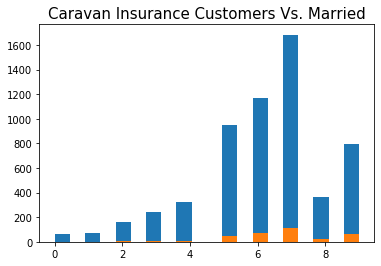

In [24]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. Married",size=15)
plt.hist(df_train['Married'],20)
plt.hist(df_class_one['Married'],20)

print('Customer counts per Purchasing power class: ')
print(df_class_one['Married'].value_counts())
print(df_train['Married'].value_counts())

This plot shows that most caravan insurance customers live in areas where most people are married

Customer counts per 1 Car owner: 
7    119
6     91
5     59
9     39
8     19
4     13
3      7
2      1
Name: 1 car, dtype: int64
6    1663
7    1413
5    1210
9     505
4     448
8     261
3     231
2      58
0      19
1      14
Name: 1 car, dtype: int64


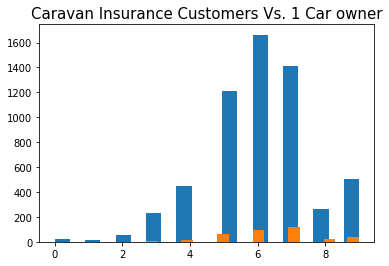

In [14]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. 1 Car owner",size=15)
plt.hist(df_train['1 car'],20)
plt.hist(df_class_one['1 car'],20)

print('Customer counts per 1 Car owner: ')
print(df_class_one['1 car'].value_counts())
print(df_train['1 car'].value_counts())

Customer counts per 2 Car owners: 
2    112
0    107
1     84
3     22
4     19
5      3
6      1
Name: 2 cars, dtype: int64
0    1854
2    1748
1    1468
3     385
4     301
5      56
6       9
7       1
Name: 2 cars, dtype: int64


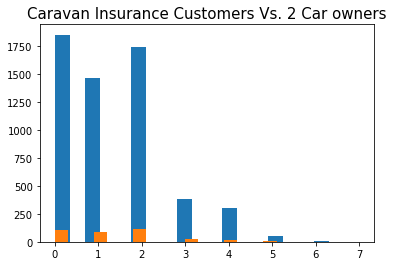

In [16]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. 2 Car owners",size=15)
plt.hist(df_train['2 cars'],20)
plt.hist(df_class_one['2 cars'],20)

print('Customer counts per 2 Car owners: ')
print(df_class_one['2 cars'].value_counts())
print(df_train['2 cars'].value_counts())

Customer counts per Contribution car policies: 


6    262
0     72
5     14
Name: Contribution car policies, dtype: int64

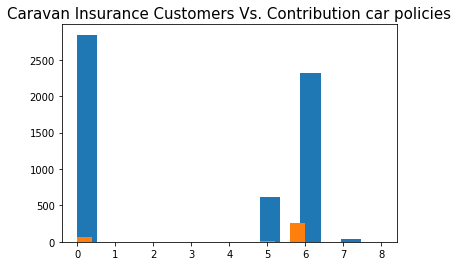

In [17]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. Contribution car policies",size=15)
plt.hist(df_train['Contribution car policies'], 15)
plt.hist(df_class_one['Contribution car policies'], 15)

print('Customer counts per Contribution car policies: ')
df_class_one['Contribution car policies'].value_counts()

From the above three plots, it is observed that people living in areas where most people own 1 car are most likely to purchase insurance, although people in areas where two cars are owned also seems to be an indicator. Furthermore, people who spend between 1000-4999 on premiums are by far most likely to purchase insurance. This will be later observed in feature selection where Random Forest shows that car ownership represents a significant indicator for Caravan Insurance Customers

Customer counts per Number of fire policies: 


1    232
0    109
2      7
Name: Number of re policies, dtype: int64

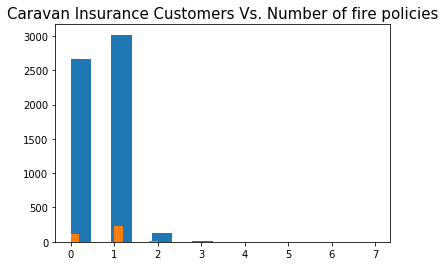

In [19]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. Number of fire policies",size=15)
plt.hist(df_train['Number of re policies'], 15)
plt.hist(df_class_one['Number of re policies'])

print('Customer counts per Number of fire policies: ')
df_class_one['Number of re policies'].value_counts()

Customer counts per Number of fire policies: 


1    232
0    109
2      7
Name: Number of re policies, dtype: int64

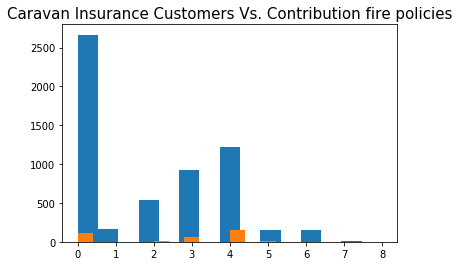

In [20]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. Contribution fire policies",size=15)
plt.hist(df_train['Contribution fire policies'], 15)
plt.hist(df_class_one['Contribution fire policies'],15)

print('Customer counts per Number of fire policies: ')
df_class_one['Number of re policies'].value_counts()


It is apparent that fire insurance policies represent another indicator of Caravan customers with the largest proportion of customers coming from people with at least 1 fire insurance policy. The plot of **Contribution fire policies** agrees with this, with large proportions of people spending between 100-500 on premiums for fire policies.

Customer counts per Number of boat policies: 


0    335
1     12
2      1
Name: Number of boat policies, dtype: int64

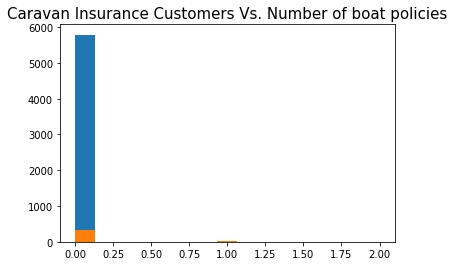

In [21]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. Number of boat policies",size=15)
plt.hist(df_train['Number of boat policies'], 15)
plt.hist(df_class_one['Number of boat policies'], 15)

print('Customer counts per Number of boat policies: ')
df_class_one['Number of boat policies'].value_counts()

In contrast to car insurance and fire insurance, other insurance information does not seem to positively correlate with caravan insurance. Similar to the above boat policy plot, it was found that a customer of all other insurance types, does not indicate that they will purchase caravan insurance.

Customer counts per Number of boat policies: 


0    335
1     12
2      1
Name: Number of boat policies, dtype: int64

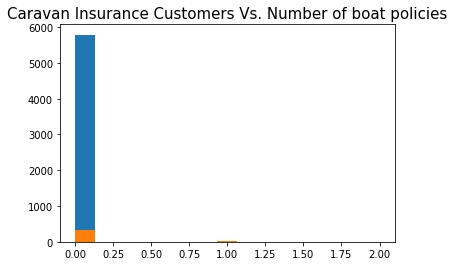

In [18]:
plt.figure()
plt.title("Caravan Insurance Customers Vs. Number of boat policies",size=15)
plt.hist(df_train['Number of boat policies'], 15)
plt.hist(df_class_one['Number of boat policies'], 15)

print('Customer counts per Number of boat policies: ')
df_class_one['Number of boat policies'].value_counts()

## Assignment 1 - Conclusions

The above analysis provides insights into the profile of potential Caravan insurance customers. It seems that middle to upper class middle aged people with families tend to be customers. This is indicated by **Married**, **Avg Age**, **Customer Main Type** and **Customer Sub-Type**.

These families can be categorized generally as being affluent young families, large religious or traditional families while families falling under the **Conservative** main type also take up sizeable proportions. These customers have moderate to high income and moderately high purchasing power. This is intuitive, as owning a caravan means that tight-knit family holidays can be achieved at a low cost, while a certain degree of freedom is provided as opposed to vacations by other means (flying can be awkward for young or large families). These demographics are also most likely to be people who own 1 or 2 cars, however a caravan being another mode of transport, families with 1 car are more likely customers, seeing as they are generally of middle class backgrounds. This is in contrast to wealthy people with no/small families who can possibly afford more expensive vacations/leisure time, while not being constrained by other modes of travel.

Other than these types of families, families with grown ups, successful hedonists and high status seniors also represent a reasonable customer base. Families with grown ups can benefit from a caravan as it means young adults with limited income have a good degree of opportunity to travel without spending too much money. Successful hedonists, which describes people who's main priority is leisure, is an obvious caravan customer. Finally, High Status Seniors are also an obvious candidate for caravan insurance as they have the means to spend a lot of time travelling, and by using a caravan have a lot of freedom and privacy to go on vacation etc.

In terms of product ownership, customers that own up to 2 cars (particularly 1 car) and spend more than average on car policies represent a strong customer base. Also customers that pay more than average on fire insurance policies are also strong canditates as caravan insuracnce customers. This makes sense as because of activites that occur in general when considering caravans (ie. camping and cooking activities), they can represent a potential fire hazard. As a result, customers who are interested in this type of insurance are also strong candidates for caravan insurance.

## Assignment 2: The purpose of assignment 2 is to find a set of 800 customers from the test set that contains the most caravan policy owners. Use your most accurate model to select the 800 most likely policy owners. 

For this assignment, feature selection will be carried out using Correlation Analysis, followed by Random Forest to select the most significant variables after strongly correlated ones have been removed

In [26]:
# Splitting up customer main type into specific categories using dummy variables. Due to previous correlation analysis
# customer subtype was removed as it had a strong correlation with Main type however specific subcategories 
# are required for accuracy
X_encoded = X
dummy = pd.get_dummies(X_encoded['Customer main type'])

In [27]:
# Splitting up customer main type into specific categories using dummy variables. Due to previous correlation analysis
# customer subtype was removed as it had a strong correlation with Main type however specific subcategories 
# are required for accuracy
dummy.columns = [ 'Successful hedonists', 'Driven Growers', 'Average Family', 'Career Loners', ' Living well', ' Cruising Seniors','Retired and Religeous',' Family with grown ups','Conservative families', 'Farmers']

In [28]:
# Drop Customer Main Type after splitting
X_encoded =X_encoded.drop(['Customer main type'], axis=1);
X_encoded.head()

,Customer Subtype,Number of houses,Avg size household,Avg Age,Roman catholic,Protestant,Other religion,No religion,Married,Living together,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
0,33,1,3,2,0,5,1,3,7,0,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,1,4,1,4,6,2,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,0,4,2,4,3,2,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,2,3,2,4,5,2,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,1,4,1,4,7,1,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# Add dummies
X_encoded = X_encoded.merge(dummy,left_index=True,right_index=True);
X_encoded.head(5)

,Customer Subtype,Number of houses,Avg size household,Avg Age,Roman catholic,Protestant,Other religion,No religion,Married,Living together,...,Successful hedonists,Driven Growers,Average Family,Career Loners,Living well,Cruising Seniors,Retired and Religeous,Family with grown ups,Conservative families,Farmers
0,33,1,3,2,0,5,1,3,7,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,2,2,1,4,1,4,6,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1,2,2,0,4,2,4,3,2,...,0,0,0,0,0,0,0,1,0,0
3,9,1,3,3,2,3,2,4,5,2,...,0,0,1,0,0,0,0,0,0,0
4,40,1,4,2,1,4,1,4,7,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
X = X_encoded
print(X.describe())

       Customer Subtype  Number of houses  Avg size household      Avg Age  \
count       5822.000000       5822.000000         5822.000000  5822.000000   
mean          24.253349          1.110615            2.678805     2.991240   
std           12.846706          0.405842            0.789835     0.814589   
min            1.000000          1.000000            1.000000     1.000000   
25%           10.000000          1.000000            2.000000     2.000000   
50%           30.000000          1.000000            3.000000     3.000000   
75%           35.000000          1.000000            3.000000     3.000000   
max           41.000000         10.000000            5.000000     6.000000   

       Roman catholic   Protestant  Other religion  No religion      Married  \
count     5822.000000  5822.000000     5822.000000  5822.000000  5822.000000   
mean         0.696496     4.626932        1.069907     3.258502     6.183442   
std          1.003234     1.715843        1.017503     1.

In [31]:
#Oversampling of Class 1 variables required due to imbalance

doOversampling = True

if doOversampling:
    sm = SMOTE(kind='regular')
    X_train, y_train = sm.fit_sample(X, y)
    print('Training Set Shape after oversampling:   ', X_train.shape, y_train.shape)
    print(pd.crosstab(y_train,y_train))
else:
    X_train = X
    y_train = y

Training Set Shape after oversampling:    (10948, 94) (10948,)
col_0     0     1
row_0            
0      5474     0
1         0  5474


### Feature Selection using correlation analysis of variables

In [32]:
def get_redundant_pairs(X):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = X.columns
    for i in range(0, X.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(X, n=5):
    au_corr = X.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Correlations")
print(get_top_abs_correlations(X, 43))

Top Absolute Correlations
Rented house                                      Home owners                                      0.999554
National Health Service                           Private health insurance                         0.999239
Contribution third party insurance (agriculture)  Number of third party insurance (agriculture)    0.987579
Contribution private third party insurance        Number of private third party insurance          0.981369
Contribution family accidents insurance policies  Number of family accidents insurance policies    0.979969
Contribution moped policies                       Number of moped policies                         0.969708
Contribution social security insurance policies   Number of social security insurance policies     0.966239
Contribution trailer policies                     Number of trailer policies                       0.966081
Contribution lorry policies                       Number of lorry policies                         0.948663
Co

In [33]:
 var =['Rented house', 'Home owners', 'National Health Service',                           'Private health insurance', 
'Contribution private third party insurance',        'Number of private third party insurance',          
'Contribution third party insurance (agriculture)',  'Number of third party insurance (agriculture)',    
'Contribution family accidents insurance policies',  'Number of family accidents insurance policies', 
'Contribution moped policies',                       'Number of moped policies',
'Contribution social security insurance policies',   'Number of social security insurance policies',
'Contribution trailer policies',                     'Number of trailer policies',
'Contribution delivery van policies',                'Number of delivery van policies',                  
'Contribution bicycle policies',                     'Number of bicycle policies',                       
'Contribution disability insurance policies',        'Number of disability insurance policies',     
'Contribution agricultural machines policies',       'Number of agricultural machines policies',
'Contribution surfboard policies',                   'Number of surfboard policies',                     
'Contribution tractor policies',                     'Number of tractor policies',
'Contribution car policies',                         'Number of car policies',
'Contribution surfboard policies',                   'Number of surfboard policies',
'Contribution motorcycle/scooter policies',          'Number of motorcycle/scooter policies',
'Contribution boat policies',                        'Number of boat policies',
'Contribution private accident insurance policies',  'Number of private accident insurance policies',
'Contribution third party insurance (firms)',        'Number of third party insurance (firms)',
'Contribution property insurance policies',          'Number of property insurance policies',
'Contribution fire policies',                        'Number of re policies',
'Contribution life insurances',                      'Number of life insurances',

'Married',                                           'Other relation',                                                                       
                    
                            
'Avg size household',                                'Household with children',                          
        
'Other relation',                                    'Singles',                                         
                       
'1 car',                                             'No car',                                           
'Medium level education',                            'Lower level education',                            
'Protestant',                                        'No religion',                                                  
'High status',                                       'Social class A',                                  
'High level education',                              'Social class A',                                                       
'Married',                                           'Singles',                                               
'Avg size household',                                'Singles',                                                               
'Other relation',                                    'No car',                                           
'Income < 30.000',                                   'Average income',
'High level education',                              'Lower level education',
'Lower level education',                             'Social class C',
'Singles',                                           'Household with children',
'Income 75-122.000',                                 'Average income',
'High status',                                       'Private health insurance',
'Skilled labourers',                                 'Social class C']

In [171]:
len(var)

82

### Investigation into how correlated each variable in a given pair is with the target class. The least correlated of each pair will be removed

In [34]:

from scipy.stats import pearsonr

var= var
print('Remove less corelated variable')
for i in range(0,86,2):
    print('')
    print('Pair')
    print(' Corelation of: Caravan Policy and ', var[i])
    corelation= pearsonr(X[var[i]],y)
    print(np.round(np.absolute(np.array(corelation)[0]),4))
    i = i+1;      
    print(' Corelation of: Caravan Policy and ', var[i])
    corelation= pearsonr(X[var[i]],y)
    print(np.round(np.absolute(np.array(corelation)[0]),4))
    print('')




Remove less corelated variable

Pair
 Corelation of: Caravan Policy and  Rented house
0.0791
 Corelation of: Caravan Policy and  Home owners
0.0784


Pair
 Corelation of: Caravan Policy and  National Health Service
0.0584
 Corelation of: Caravan Policy and  Private health insurance
0.0575


Pair
 Corelation of: Caravan Policy and  Contribution private third party insurance
0.0965
 Corelation of: Caravan Policy and  Number of private third party insurance
0.0894


Pair
 Corelation of: Caravan Policy and  Contribution third party insurance (agriculture)
0.0216
 Corelation of: Caravan Policy and  Number of third party insurance (agriculture)
0.0213


Pair
 Corelation of: Caravan Policy and  Contribution family accidents insurance policies
0.0402
 Corelation of: Caravan Policy and  Number of family accidents insurance policies
0.0335


Pair
 Corelation of: Caravan Policy and  Contribution moped policies
0.0444
 Corelation of: Caravan Policy and  Number of moped policies
0.0451


Pair
 Core

IndexError: list index out of range

In [34]:
var=58

print(X.describe())
print('Variables selected :  ', list(X.columns.values[[1,2,3,4,6,7,8,9,12,14,16,17,18,19,20,21,22,23,24,27,28,30,31,33,36,37,39,40,41,42,43,44,45,49,51,54,55,56,57,67,68,71,73,74,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93]]))

selected = X.columns.values[[1,2,3,4,6,7,8,9,12,14,16,17,18,19,20,21,22,23,24,27,28,30,31,33,36,37,39,40,41,42,43,44,45,49,51,54,55,56,57,67,68,71,73,74,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93]]

X1 = (X[X.columns[[1,2,3,4,6,7,8,9,12,14,16,17,18,19,20,21,22,23,24,27,28,30,31,33,36,37,39,40,41,42,43,44,45,49,51,54,55,56,57,67,68,71,73,74,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93]]].values)



# Normalization - Using MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)

y1 = np.vstack(df_train['CARAVAN POLICY'].values)

print('\n')
print('X and y Input Data:   ', X1.shape, y1.shape)


       Customer Subtype  Number of houses  Avg size household      Avg Age  \
count       5822.000000       5822.000000         5822.000000  5822.000000   
mean          24.253349          1.110615            2.678805     2.991240   
std           12.846706          0.405842            0.789835     0.814589   
min            1.000000          1.000000            1.000000     1.000000   
25%           10.000000          1.000000            2.000000     2.000000   
50%           30.000000          1.000000            3.000000     3.000000   
75%           35.000000          1.000000            3.000000     3.000000   
max           41.000000         10.000000            5.000000     6.000000   

       Roman catholic   Protestant  Other religion  No religion      Married  \
count     5822.000000  5822.000000     5822.000000  5822.000000  5822.000000   
mean         0.696496     4.626932        1.069907     3.258502     6.183442   
std          1.003234     1.715843        1.017503     1.

In [35]:
# Once again oversampling Class 1

doOversampling = True

if doOversampling:
# Apply regular SMOTE
    sm = SMOTE(kind='regular')
    X_train, y_train = sm.fit_sample(X1,y1)
    print('Training Set Shape after oversampling:   ', X_train.shape, y_train.shape)
    print(pd.crosstab(y_train,y_train))
else:
    X_train = X1
    y_train = y1

Training Set Shape after oversampling:    (10948, 59) (10948,)
col_0     0     1
row_0            
0      5474     0
1         0  5474


### Final Feature Selection Using Random Forrest

Here, Random Forest is used to see which variables are most frequent in making predictions of class. Please note the change in indices after data index 5 due to Customer Main Type being removed. 

In [41]:
clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight=None)
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Feature ranking:
1. Contribution car policies (0.101243)
2. Average income (0.056674)
3. Contribution fire policies (0.048921)
4. 1 car (0.047596)
5. High level education (0.046827)
6. Roman catholic (0.039172)
7. Contribution private third party insurance (0.035041)
8. Entrepreneur (0.031323)
9. Income 45-75.000 (0.029654)
10. Social class A (0.029386)
11. Social class B1 (0.029002)
12. Married (0.028755)
13. 2 cars (0.027607)
14. High status (0.025260)
15. Living together (0.024990)
16. Social class D (0.024686)
17. Skilled labourers (0.023947)
18. Lower level education (0.023251)
19. Middle Management (0.023091)
20. Income 30-45.000 (0.022667)
21. Avg size household (0.022257)
22. Purchasing power class (0.021856)
23. No religion (0.021195)
24. Other religion (0.021112)
25. Household without children (0.019935)
26. Avg Age (0.019119)
27. Income >123.000 (0.018923)
28. National Health Service (0.018878)
29. Unskilled labourers (0.018148)
30. Farmer (0.017276)
31. Rented house (0.0171

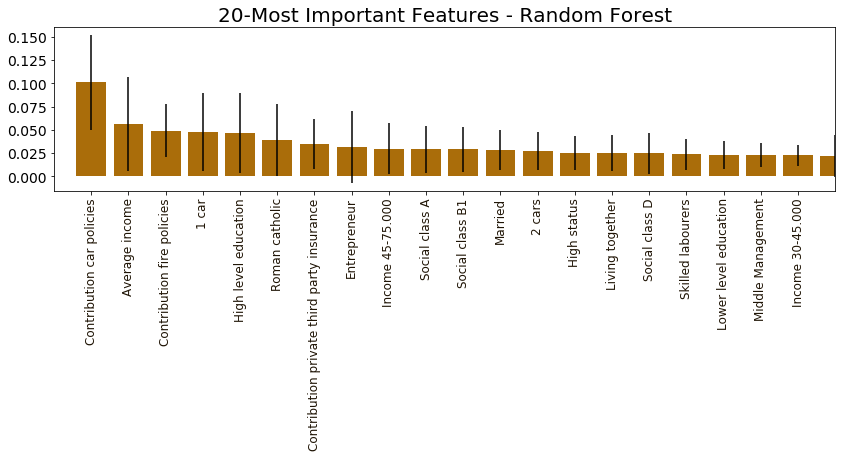

In [42]:
lim = 20

importances_RF = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_],
             axis=0)
indices1 = np.argsort(importances_RF[0:var])[::-1]

indices = indices1[0:var]

print("Feature ranking:")

for f in range(var):
    print("%d. %s (%f)" % (f + 1, (X.columns.values[[1,2,3,4,6,7,8,9,12,14,16,17,18,19,20,21,22,23,24,27,28,30,31,33,36,37,39,40,41,42,43,44,45,49,51,54,55,56,57,67,68,71,73,74,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93]]).reshape(-1)[indices[f]], importances_RF[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(14, 3))
plt.title("20-Most Important Features - Random Forest",size=20)
plt.bar(range(var), importances_RF[indices],
       color="#aa6d0a", yerr=std[indices], align="center")
plt.yticks(size=14)
plt.xticks(range(lim), (X.columns.values[[1,2,3,4,6,7,8,9,12,14,16,17,18,19,20,21,22,23,24,27,28,30,31,33,36,37,39,40,41,42,43,44,45,49,51,54,55,56,57,67,68,71,73,74,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93]]).reshape(-1)[indices],rotation='vertical',size=12,color="#201506")
plt.xlim([-1, lim])
plt.show()

### Final Features Used

In [36]:
var=20

print('Variables selected :  ', list(X.columns.values[[45,40,57,30,14,4,42,37,24,8,18,27,31,23,21,17,20,9,16,36]]))
                                     
                      
selected2 = X.columns.values[[45,40,57,30,14,4,42,37,24,8,18,27,31,23,21,17,20,9,16,36]]

X2 = (X[X.columns[[45,40,57,30,14,4,42,37,24,8,18,27,31,23,21,17,20,9,16,36]]].values)



# Normalization - Using MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X2 = min_max_scaler.fit_transform(X2)

y2 = np.vstack(df_train['CARAVAN POLICY'].values)

print('\n')
print('X and y Input Data:   ', X2.shape, y2.shape)

Variables selected :   ['Contribution car policies', 'Average income', 'Contribution fire policies', '1 car', 'High level education', 'Roman catholic', 'Contribution private third party insurance', 'Income 45-75.000', 'Social class B1', 'Married', 'Entrepreneur', 'Social class D', '2 cars', 'Social class A', 'Skilled labourers', 'High status', 'Middle Management', 'Living together', 'Lower level education', 'Income 30-45.000']


X and y Input Data:    (5822, 20) (5822, 1)


In [37]:
doOversampling = True

if doOversampling:
    sm = SMOTE(kind='regular')
    X_train, y_train = sm.fit_sample(X2, y2)
    print('Training Set Shape after oversampling:   ', X_train.shape, y_train.shape)
    print(pd.crosstab(y_train,y_train))
else:
    X_train = X2
    y_train = y2

Training Set Shape after oversampling:    (10948, 20) (10948,)
col_0     0     1
row_0            
0      5474     0
1         0  5474


### Measuring Classifiers on training data

In [38]:
clf_DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=None, 
                                max_leaf_nodes=None, min_impurity_split=1e-07, random_state = 0)
clf_DT.fit(X2, y2)

cv_scoresDT = cross_val_score(clf_DT, X2, y2, cv=10)

y_pred_DT = cross_val_predict(clf_DT, X2, y2, cv=10)

In [39]:
clf_NB = BernoulliNB()
clf_NB.fit(X2, y2)

cv_scoresNB = cross_val_score(clf_NB, X2, y2, cv=10)
y_pred_NB = cross_val_predict(clf_NB, X2, y2, cv=10)


In [40]:
MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))
clf_MLP.fit(X2, y2)

cv_scoresMLP = cross_val_score(clf_MLP, X2, y2, cv=10)
y_pred_MLP = cross_val_predict(clf_MLP, X2, y2, cv=10)

In [41]:
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=0,verbose=2,class_weight='balanced')

clf_Log.fit(X2, y2)
print(clf_Log.coef_)
print(clf_Log.intercept_)

cv_scoresLog = cross_val_score(clf_Log, X2, y2, cv=10)
y_pred_Log = cross_val_predict(clf_Log, X2, y2, cv=10)

[LibLinear][[ 1.74874855  0.84662763  0.83791425  0.67298073  0.93681994 -0.600214
   0.40483042  0.18506451 -0.5377935   0.62332042  0.49301714 -0.11141558
  -0.18930338 -0.70182316  0.45820083  0.67775341  1.02419016 -0.69315849
  -0.70095766  0.52491991]]
[-2.83675291]
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [43]:
clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight=None)
clf_RF.fit(X2, y2)
cv_scoresRF = cross_val_score(clf_RF, X2, y2, cv=10)
y_pred_RF = cross_val_predict(clf_RF, X2, y2, cv=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [44]:
from sklearn.ensemble import AdaBoostClassifier

clf_AdaB = AdaBoostClassifier(n_estimators=100)
clf_AdaB.fit(X2, y2)
cv_scoresAdaB = cross_val_score(clf_AdaB, X2, y2, cv=10)
y_pred_AdaB = cross_val_predict(clf_AdaB, X2, y2, cv=10)


In [45]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
clf_GB.fit(X2, y2)

cv_scoresGB = cross_val_score(clf_GB, X2, y2, cv=10)
y_pred_GB = cross_val_predict(clf_GB, X2, y2, cv=10)



In [46]:
clf_ET = ExtraTreesClassifier(n_estimators=250, random_state=0)
clf_ET.fit(X2, y2)

cv_scoresET = cross_val_score(clf_ET, X2, y2, cv=10)
y_pred_ET = cross_val_predict(clf_ET, X2, y2, cv=10)

In [47]:
clf_SVM = SVC(C=10, class_weight='balanced', gamma='auto', kernel='rbf',
              max_iter=-1, probability=True, random_state=0, verbose=True)

clf_SVM.fit(X2, y2)

cv_scoresSVM = cross_val_score(clf_SVM, X2, y2, cv=10)
y_pred_SVM = cross_val_predict(clf_SVM, X2, y2, cv=10)



[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [48]:
clf_GNB = GaussianNB()

clf_GNB.fit(X2,y2)

cv_scoresGNB = cross_val_score(clf_GNB, X2, y2, cv=10)
y_pred_GNB = cross_val_predict(clf_GNB, X2, y2, cv=10)


In [49]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [50]:
clf_DTR = DecisionTreeRegressor()
clf_DTR.fit(X2, y2)

cv_scoresDTR = cross_val_score(clf_DTR, X2, y2, cv=10)
y_pred_DTR = cross_val_predict(clf_DTR, X2, y2, cv=10)

In [51]:
clf_RFR = RandomForestRegressor()
clf_RFR.fit(X2, y2)

cv_scoresRFR = cross_val_score(clf_RFR, X2, y2, cv=10)
y_pred_RFR = cross_val_predict(clf_RFR, X2, y2, cv=10)

In [52]:
clf_ETR = ExtraTreesRegressor()
clf_ETR.fit(X2, y2)

cv_scoresETR = cross_val_score(clf_ETR, X2, y2, cv=10)
y_pred_ETR = cross_val_predict(clf_ETR, X2, y2, cv=10)

In [53]:
clf_KNR = KNeighborsRegressor()
clf_KNR.fit(X2, y2)

cv_scoresKNR = cross_val_score(clf_KNR, X2, y2, cv=10)
y_pred_KNR = cross_val_predict(clf_KNR, X2, y2, cv=10)

In [57]:
print('       Accuracy of Models       ')
print('--------------------------------')
print('Decision Tree           '+"{:.2f}".format(accuracy_score(y2, y_pred_DT)*100)+'%')
print('Naive Bayes             '+"{:.2f}".format(accuracy_score(y2, y_pred_NB)*100)+'%')
print('Neural Network          '+"{:.2f}".format(accuracy_score(y2, y_pred_MLP)*100)+'%')
print('Logistic Regression     '+"{:.2f}".format(accuracy_score(y2, y_pred_Log)*100)+'%')
print('Random Forest           '+"{:.2f}".format(accuracy_score(y2, y_pred_RF)*100)+'%')
print('AdaBoost                '+"{:.2f}".format(accuracy_score(y2, y_pred_AdaB)*100)+'%')
print('GradientBoost           '+"{:.2f}".format(accuracy_score(y2, y_pred_GB)*100)+'%')
print('Extra Tree              '+"{:.2f}".format(accuracy_score(y2, y_pred_ET)*100)+'%')
print('Support Vector Machine  '+"{:.2f}".format(accuracy_score(y2, y_pred_SVM)*100)+'%')
print('Gaussian Naive Bayes    '+"{:.2f}".format(accuracy_score(y2, y_pred_GNB)*100)+'%')


       Accuracy of Models       
--------------------------------
Decision Tree           91.93%
Naive Bayes             94.02%
Neural Network          93.99%
Logistic Regression     66.28%
Random Forest           92.75%
AdaBoost                93.87%
GradientBoost           92.20%
Extra Tree              92.13%
Support Vector Machine  66.94%
Gaussian Naive Bayes    87.26%


In [56]:
print('Decision Tree  ')
cm_DT = confusion_matrix(y2,y_pred_DT)
print(cm_DT)
print('\n')

print('Naive Bayes  ')
cm_NB = confusion_matrix(y2,y_pred_NB)
print(cm_NB)
print('\n')

print('Neural Network  ')
cm_MLP = confusion_matrix(y2,y_pred_MLP)
print(cm_MLP)
print('\n')

print('Logistic Regression  ')
cm_Log = confusion_matrix(y2,y_pred_Log)
print(cm_Log)
print('\n')

print('Random Forest  ')
cm_RF = confusion_matrix(y2,y_pred_RF)
print(cm_RF)
print('\n')

print('AdaBoost  ')
cm_AdaB = confusion_matrix(y2,y_pred_AdaB)
print(cm_AdaB)
print('\n')

print('GradientBoost  ')
cm_GB = confusion_matrix(y2,y_pred_GB)
print(cm_GB)
print('\n')

print('Extra Tree  ')
cm_ET = confusion_matrix(y2,y_pred_ET)
print(cm_ET)
print('\n')

print('SVM  ')
cm_SVM = confusion_matrix(y2,y_pred_SVM)
print(cm_SVM)
print('\n')

print('Gaussian Naive Bayes  ')
cm_GNB = confusion_matrix(y2,y_pred_GNB)
print(cm_GNB)


Decision Tree  
[[5327  147]
 [ 323   25]]


Naive Bayes  
[[5474    0]
 [ 348    0]]


Neural Network  
[[5470    4]
 [ 346    2]]


Logistic Regression  
[[3627 1847]
 [ 116  232]]


Random Forest  
[[5385   89]
 [ 333   15]]


AdaBoost  
[[5463   11]
 [ 346    2]]


GradientBoost  
[[5352  122]
 [ 332   16]]


Extra Tree  
[[5344  130]
 [ 328   20]]


SVM  
[[3663 1811]
 [ 114  234]]


Gaussian Naive Bayes  
[[4992  482]
 [ 260   88]]


### Use on test set

In [58]:
df_test = read_csv('caravanTest.csv')
X_test = df_test.iloc[:,0:len(df_test.columns)-1]
y_test = df_test['CARAVAN POLICY']

In [59]:
#Altering dataset of X_test to expand Customer Main Type
X_encoded = X_test

dummy = pd.get_dummies(X_encoded['Customer main type'])

In [60]:
dummy.columns = [ 'Successful hedonists', 'Driven Growers', 'Average Family', 'Career Loners', ' Living well', ' Cruising Seniors','Retired and Religeous',' Family with grown ups','Conservative families', 'Farmers']

In [61]:
X_encoded =X_encoded.drop(['Customer main type'], axis=1);
X_encoded.head()

,Customer Subtype,Number of houses,Avg size household,Avg Age,Roman catholic,Protestant,Other religion,No religion,Married,Living together,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
0,33,1,4,2,0,6,0,3,5,0,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,0,5,0,4,5,2,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,1,4,2,3,5,2,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,2,3,2,4,5,4,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,0,2,0,7,9,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
X_encoded = X_encoded.merge(dummy,left_index=True,right_index=True);
X_encoded.head(5)

,Customer Subtype,Number of houses,Avg size household,Avg Age,Roman catholic,Protestant,Other religion,No religion,Married,Living together,...,Successful hedonists,Driven Growers,Average Family,Career Loners,Living well,Cruising Seniors,Retired and Religeous,Family with grown ups,Conservative families,Farmers
0,33,1,4,2,0,6,0,3,5,0,...,0,0,0,0,0,0,0,1,0,0
1,6,1,3,2,0,5,0,4,5,2,...,0,1,0,0,0,0,0,0,0,0
2,39,1,3,3,1,4,2,3,5,2,...,0,0,0,0,0,0,0,0,1,0
3,9,1,2,3,2,3,2,4,5,4,...,0,0,1,0,0,0,0,0,0,0
4,31,1,2,4,0,2,0,7,9,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
X_test = X_encoded
print(X_test.describe())

       Customer Subtype  Number of houses  Avg size household      Avg Age  \
count       4000.000000        4000.00000         4000.000000  4000.000000   
mean          24.253000           1.10600            2.675750     3.004000   
std           13.022822           0.42108            0.767306     0.790025   
min            1.000000           1.00000            1.000000     1.000000   
25%           10.000000           1.00000            2.000000     3.000000   
50%           30.000000           1.00000            3.000000     3.000000   
75%           35.000000           1.00000            3.000000     3.000000   
max           41.000000          10.00000            6.000000     6.000000   

       Roman catholic   Protestant  Other religion  No religion      Married  \
count     4000.000000  4000.000000     4000.000000  4000.000000  4000.000000   
mean         0.706750     4.653250        1.021250     3.269500     6.197000   
std          1.032241     1.729093        1.001274     1.

In [64]:
var=20
#Final Variables
print('Variables selected :  ', list(X_test.columns.values[[45,40,57,30,14,4,42,37,24,8,18,27,31,23,21,17,20,9,16,36]]))
                                     
                      
selected2 = X_test.columns.values[[45,40,57,30,14,4,42,37,24,8,18,27,31,23,21,17,20,9,16,36]]

X_test = (X_test[X_test.columns[[45,40,57,30,14,4,42,37,24,8,18,27,31,23,21,17,20,9,16,36]]].values)



# Normalization - Using MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X_test = min_max_scaler.fit_transform(X_test)

y_test = np.vstack(df_test['CARAVAN POLICY'].values)

print('\n')
print('X and y Input Data:   ', X_test.shape, y_test.shape)

Variables selected :   ['Contribution car policies', 'Average income', 'Contribution fire policies', '1 car', 'High level education', 'Roman catholic', 'Contribution private third party insurance', 'Income 45-75.000', 'Social class B1', 'Married', 'Entrepreneur', 'Social class D', '2 cars', 'Social class A', 'Skilled labourers', 'High status', 'Middle Management', 'Living together', 'Lower level education', 'Income 30-45.000']


X and y Input Data:    (4000, 20) (4000, 1)


### Running models on test data

In [65]:
clf_DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=None, 
                                max_leaf_nodes=None, min_impurity_split=1e-07, random_state = 0)
clf_DT.fit(X2,y2)
y_pred_DT = clf_DT.predict(X_test)


clf_NB = BernoulliNB()
clf_NB.fit(X2, y2)

y_pred_NB = clf_NB.predict(X_test)


clf_SVM = SVC(C=10, class_weight='balanced', gamma='auto', kernel='rbf',
              max_iter=-1, probability=True, random_state=0, verbose=True)

clf_SVM.fit(X2, y2)

y_pred_SVM = clf_NB.predict(X_test)


clf_AdaB = AdaBoostClassifier(n_estimators=100)
clf_AdaB.fit(X2, y2)
y_pred_AdaB = clf_AdaB.predict(X_test)

MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))
clf_MLP.fit(X2, y2)

y_pred_MLP = clf_MLP.predict(X_test)


[LibSVM]

In [66]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
clf_GB.fit(X2, y2)

y_pred_GB = clf_GB.predict(X_test)



clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight=None)
clf_RF.fit(X2, y2)
y_pred_RF = clf_RF.predict(X_test)


clf_ET = ExtraTreesClassifier(n_estimators=250, random_state=0)
clf_ET.fit(X2, y2)

y_pred_ET = clf_ET.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


In [67]:
## Also using Regressors to predict the most probable customers

clf_DTR = DecisionTreeRegressor()
clf_DTR.fit(X2, y2)

y_pred_DTR = clf_DTR.predict(X_test)

clf_RFR = RandomForestRegressor()
clf_RFR.fit(X2, y2)

y_pred_RFR = clf_RFR.predict(X_test)


clf_ETR = ExtraTreesRegressor()
clf_ETR.fit(X2, y2)

y_pred_ETR = clf_ETR.predict(X_test)

clf_KNR = KNeighborsRegressor()
clf_KNR.fit(X2, y2)

y_pred_KNR = clf_KNR.predict(X_test)

clf_SCR =SVR()
clf_SCR.fit(X2,y2)
y_pred_SCR = clf_SCR.predict(X_test)

clf_GNB.fit(X2,y2)
y_pred_GNB = clf_GNB.predict(X_test)

clf_Log.fit(X2,y2)
y_pred_Log = clf_Log.predict(X_test)

[LibLinear]

In [68]:
print('       AUC Scores      ')
print('--------------------------------')
print('Decision Tree           '+"{:.2f}".format(roc_auc_score(y_test, y_pred_DT)*100)+'%')
print('Naive Bayes             '+"{:.2f}".format(roc_auc_score(y_test, y_pred_NB)*100)+'%')
print('Neural Network          '+"{:.2f}".format(roc_auc_score(y_test, y_pred_MLP)*100)+'%')
print('Logistic Regression     '+"{:.2f}".format(roc_auc_score(y_test, y_pred_Log)*100)+'%')
print('Random Forest           '+"{:.2f}".format(roc_auc_score(y_test, y_pred_RF)*100)+'%')
print('AdaBoost                '+"{:.2f}".format(roc_auc_score(y_test, y_pred_AdaB)*100)+'%')
print('Extra Tree              '+"{:.2f}".format(roc_auc_score(y_test, y_pred_ET)*100)+'%')
print('Support Vector Machine  '+"{:.2f}".format(roc_auc_score(y_test, y_pred_SVM)*100)+'%')
print('Gaussian Naive Bayes    '+"{:.2f}".format(roc_auc_score(y_test, y_pred_GNB)*100)+'%')
print('Decision Tree Regressor '+"{:.2f}".format(roc_auc_score(y_test, y_pred_DTR)*100)+'%')
print('Extra Tree Regressor    '+"{:.2f}".format(roc_auc_score(y_test, y_pred_ETR)*100)+'%')
print('Random Forest Regressor '+"{:.2f}".format(roc_auc_score(y_test, y_pred_RFR)*100)+'%')
print('KNeighbour Regressor    '+"{:.2f}".format(roc_auc_score(y_test, y_pred_KNR)*100)+'%')





       AUC Scores      
--------------------------------
Decision Tree           51.94%
Naive Bayes             49.99%
Neural Network          50.00%
Logistic Regression     65.97%
Random Forest           50.55%
AdaBoost                49.99%
Extra Tree              52.47%
Support Vector Machine  49.99%
Logistic Regression     65.97%
Gaussian Naive Bayes    58.25%
Decision Tree Regressor 53.28%
Extra Tree Regressor    63.56%
Random Forest Regressor 56.43%
KNeighbour Regressor    62.26%


From the above, we have that Logistic Regression (with feature selection using Correlation Analysis and Random Forest) had the best AUC score when trying to make class predictions. This AUC of these classifiers has not performed very well with Logestic Regresion achieving the highest at 65.97%. A noteable result is that Naive Bayes did not perform well